# Collecting images for ready-pose and non ready-pose

In [2]:
non_ready_pose_path = "Pushup dataset/dataset/non_ready_pose"
ready_pose_path = "Pushup dataset/dataset/ready_pose"

In [6]:
import cv2
import mediapipe as mp
import numpy as np
import os
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [81]:
# For checking whether landmarks can be detected on the collected images
ready_pose_imgs = os.listdir(ready_pose_path)
with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True, min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(ready_pose_imgs):
        
        image = cv2.imread(os.path.join(ready_pose_path, file))
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            print(f"For image {file}:")
            print("Failed to detect landmarks!")
            continue
        
        # Draw pose landmarks on the image.
        mp_drawing.draw_landmarks(image, results.pose_landmarks, landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#         cv2.imshow("Annotated img", image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

# Preprocess the images using Mediapipe

In [83]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
non_ready_pose_path = "Pushup dataset/dataset/non_ready_pose"
ready_pose_path = "Pushup dataset/dataset/ready_pose"

In [84]:
# the features exclude the facial landmarks, becoz those are not helpful at determining push-up
features = [
    mp_pose.PoseLandmark.LEFT_SHOULDER,
    mp_pose.PoseLandmark.RIGHT_SHOULDER,
    mp_pose.PoseLandmark.LEFT_ELBOW,
    mp_pose.PoseLandmark.RIGHT_ELBOW,
    mp_pose.PoseLandmark.LEFT_WRIST,
    mp_pose.PoseLandmark.RIGHT_WRIST,
    mp_pose.PoseLandmark.LEFT_PINKY,
    mp_pose.PoseLandmark.RIGHT_PINKY,
    mp_pose.PoseLandmark.LEFT_INDEX,
    mp_pose.PoseLandmark.RIGHT_INDEX,
    mp_pose.PoseLandmark.LEFT_THUMB,
    mp_pose.PoseLandmark.RIGHT_THUMB,
    mp_pose.PoseLandmark.LEFT_HIP,
    mp_pose.PoseLandmark.RIGHT_HIP,
    mp_pose.PoseLandmark.LEFT_KNEE,
    mp_pose.PoseLandmark.RIGHT_KNEE,
    mp_pose.PoseLandmark.LEFT_ANKLE,
    mp_pose.PoseLandmark.RIGHT_ANKLE,
    mp_pose.PoseLandmark.LEFT_HEEL,
    mp_pose.PoseLandmark.RIGHT_HEEL,
    mp_pose.PoseLandmark.LEFT_FOOT_INDEX,
    mp_pose.PoseLandmark.RIGHT_FOOT_INDEX
]

feature_names = [
    "LEFT_SHOULDER",
    "RIGHT_SHOULDER",
    "LEFT_ELBOW",
    "RIGHT_ELBOW",
    "LEFT_WRIST",
    "RIGHT_WRIST",
    "LEFT_PINKY",
    "RIGHT_PINKY",
    "LEFT_INDEX",
    "RIGHT_INDEX",
    "LEFT_THUMB",
    "RIGHT_THUMB",
    "LEFT_HIP",
    "RIGHT_HIP",
    "LEFT_KNEE",
    "RIGHT_KNEE",
    "LEFT_ANKLE",
    "RIGHT_ANKLE",
    "LEFT_HEEL",
    "RIGHT_HEEL",
    "LEFT_FOOT_INDEX",
    "RIGHT_FOOT_INDEX"
]

classes = {
    "non_ready_pose": 0,
    "ready_pose": 1
}
print("Number of features (each feature has x-, y-, and z-coordinates) = ", len(features) * 3)

Number of features (each feature has x-, y-, and z-coordinates) =  66


In [85]:
def normalize_pose_landmarks(pose_landmarks_dict):
    """Calculates pose center as point between hips."""
    left_hip = pose_landmarks_dict['LEFT_HIP']
    right_hip = pose_landmarks_dict['RIGHT_HIP']
    center = []
    for i in range(len(left_hip)):
        center.append((left_hip[i] + right_hip[i]) * 0.5)
    for key, coordinates in pose_landmarks_dict.items():
        for i in range(len(coordinates)):
            coordinates[i] -= center[i]
        pose_landmarks_dict[key] = coordinates
    return pose_landmarks_dict

In [87]:
import os
import csv
import sys

non_ready_pose_imgs = os.listdir(non_ready_pose_path)
ready_pose_imgs = os.listdir(ready_pose_path)
filename = "Pushup dataset/dataset/ready_pose_normalized_landmarks.csv"
with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True, min_detection_confidence=0.5) as pose:
    print("Detecting landmarks on non_ready_pose images:")
    non_ready_pose_records = []
    for idx, file in enumerate(non_ready_pose_imgs):
        image = cv2.imread(os.path.join(non_ready_pose_path, file))
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            print(f"Failed to detect landmarks for file {file}...")
            continue
        
        # extract the x-, y-, and z-coordinates of the 22 body landmarks as features
        record = []
        landmarks_dict_non_ready = {}
        for index, ft in enumerate(features):
            landmark_coordinates = results.pose_landmarks.landmark[ft]
            landmarks_dict_non_ready[feature_names[index]] = [landmark_coordinates.x, landmark_coordinates.y, landmark_coordinates.z]
        landmarks_dict_non_ready = normalize_pose_landmarks(landmarks_dict_non_ready)
        
        for normalized_coordinates in landmarks_dict_non_ready.values():
            for normalized_coor in normalized_coordinates:
                record.append(normalized_coor)
        
        record.append(classes["non_ready_pose"])
        non_ready_pose_records.append(record)
        record = []
        #print("results = ")
        #print(results.pose_landmarks)
#         print("Right heel")
#         print(f'coordinates: ({str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width)}, {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_height)})')
#         print(f"visibility: {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility)}")
    
    ready_pose_records = []
    print("Detecting landmarks on ready pose images:")
    for idx, file in enumerate(ready_pose_imgs):
        image = cv2.imread(os.path.join(ready_pose_path, file))
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            print(f"Failed to detect landmarks for file {file}...")
            continue
        
        # extract the x-, y-, and z-coordinates of the 22 body landmarks as features
        record = []
        landmarks_dict_ready = {}
        for index, ft in enumerate(features):
            landmark_coordinates = results.pose_landmarks.landmark[ft]
            landmarks_dict_ready[feature_names[index]] = [landmark_coordinates.x, landmark_coordinates.y, landmark_coordinates.z]
        landmarks_dict_ready = normalize_pose_landmarks(landmarks_dict_ready)
        
        for normalized_coordinates in landmarks_dict_ready.values():
            for normalized_coor in normalized_coordinates:
                record.append(normalized_coor)
        
        record.append(classes["ready_pose"])
        ready_pose_records.append(record)
        record = []
        
    # writing to csv file
    with open(filename, 'w', newline="") as csvfile:
        csvwriter = csv.writer(csvfile)
        # writing the records
        csvwriter.writerows(non_ready_pose_records)
        csvwriter.writerows(ready_pose_records)
        
        print(f"Successfully written {str(len(non_ready_pose_records))} records for non-ready pose")
        print(f"Successfully written {str(len(ready_pose_records))} records for ready pose")
    
        

Detecting landmarks on non_ready_pose images:
Detecting landmarks on ready pose images:
Successfully written 289 records for non-ready pose
Successfully written 271 records for ready pose


# Training classifier

Train a classifier to classify between three categories:
- Ready pose
- Non-ready pose could be
    - push-up DOWN
    - completely lying down
    - failed to hold your push-up DOWN position
    - standing straight
    - standing with opened legs
    - bending waist
    - standing by raising any one of your arms
    - standing by raising any one of ur legs

In [108]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [109]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [110]:
header_names = [
    "LEFT_SHOULDER_x",
    "LEFT_SHOULDER_y",
    "LEFT_SHOULDER_z",
    "RIGHT_SHOULDER_x",
    "RIGHT_SHOULDER_y",
    "RIGHT_SHOULDER_z",
    "LEFT_ELBOW_x",
    "LEFT_ELBOW_y",
    "LEFT_ELBOW_z",
    "RIGHT_ELBOW_x",
    "RIGHT_ELBOW_y",
    "RIGHT_ELBOW_z",
    "LEFT_WRIST_x",
    "LEFT_WRIST_y",
    "LEFT_WRIST_z",
    "RIGHT_WRIST_x",
    "RIGHT_WRIST_y",
    "RIGHT_WRIST_z",
    "LEFT_PINKY_x",
    "LEFT_PINKY_y",
    "LEFT_PINKY_z",
    "RIGHT_PINKY_x",
    "RIGHT_PINKY_y",
    "RIGHT_PINKY_z",
    "LEFT_INDEX_x",
    "LEFT_INDEX_y",
    "LEFT_INDEX_z",
    "RIGHT_INDEX_x",
    "RIGHT_INDEX_y",
    "RIGHT_INDEX_z",
    "LEFT_THUMB_x",
    "LEFT_THUMB_y",
    "LEFT_THUMB_z",
    "RIGHT_THUMB_x",
    "RIGHT_THUMB_y",
    "RIGHT_THUMB_z",
    "LEFT_HIP_x",
    "LEFT_HIP_y",
    "LEFT_HIP_z",
    "RIGHT_HIP_x",
    "RIGHT_HIP_y",
    "RIGHT_HIP_z",
    "LEFT_KNEE_x",
    "LEFT_KNEE_y",
    "LEFT_KNEE_z",
    "RIGHT_KNEE_x",
    "RIGHT_KNEE_y",
    "RIGHT_KNEE_z",
    "LEFT_ANKLE_x",
    "LEFT_ANKLE_y",
    "LEFT_ANKLE_z",
    "RIGHT_ANKLE_x",
    "RIGHT_ANKLE_y",
    "RIGHT_ANKLE_z",
    "LEFT_HEEL_x",
    "LEFT_HEEL_y",
    "LEFT_HEEL_z",
    "RIGHT_HEEL_x",
    "RIGHT_HEEL_y",
    "RIGHT_HEEL_z",
    "LEFT_FOOT_INDEX_x",
    "LEFT_FOOT_INDEX_y",
    "LEFT_FOOT_INDEX_z",
    "RIGHT_FOOT_INDEX_x",
    "RIGHT_FOOT_INDEX_y",
    "RIGHT_FOOT_INDEX_z",
    "Class"
]

In [111]:
file_path = "Pushup dataset/dataset/ready_pose_normalized_landmarks.csv"
raw_df = pd.read_csv(file_path, names=header_names)
raw_df.head()

,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,LEFT_ELBOW_x,LEFT_ELBOW_y,LEFT_ELBOW_z,RIGHT_ELBOW_x,...,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,Class
0,-0.370068,-0.277369,-0.180047,-0.343480,-0.277515,0.271469,-0.309987,-0.005125,-0.264044,-0.262705,...,0.132224,0.149271,0.144281,0.129438,0.395068,0.068986,0.132426,0.355391,0.190745,0
1,-0.383217,-0.264705,-0.247397,-0.379147,-0.271407,0.270307,-0.275251,0.013651,-0.327623,-0.279236,...,0.133390,0.130136,0.229807,0.141491,0.427319,0.098689,0.147431,0.369046,0.287896,0
2,-0.403539,-0.203614,-0.265528,-0.385844,-0.223906,0.217864,-0.370795,0.103417,-0.337417,-0.299501,...,0.113503,0.163308,0.263840,0.129009,0.454948,0.125153,0.121679,0.407098,0.315638,0
3,-0.351645,-0.256737,-0.262605,-0.387170,-0.211454,0.204805,-0.192932,0.003062,-0.276079,-0.291625,...,0.050051,0.166088,0.190684,0.142792,0.433806,0.039919,0.070894,0.345061,0.234323,0
4,-0.354204,-0.131713,-0.003458,-0.257284,-0.147500,0.378277,-0.422635,0.172286,-0.068286,-0.226711,...,0.265551,0.266073,-0.100980,0.214680,0.594157,-0.066865,0.254682,0.461555,-0.099112,0


In [112]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n Negative: {} ({:.2f}% of total)'.format(
    total, pos, 100 * pos / total, neg, 100 * neg / total))

Examples:
    Total: 560
    Positive: 271 (48.39% of total)
 Negative: 289 (51.61% of total)


In [113]:
train_df, test_df = train_test_split(raw_df, test_size=0.2)
print(train_df.shape)
print(test_df.shape)

(448, 67)
(112, 67)


In [114]:
y_train = np.array(train_df.pop("Class"))
X_train = np.array(train_df)
y_test = np.array(test_df.pop("Class"))
X_test = np.array(test_df)

In [123]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

In [124]:
EPOCHS = 200
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    restore_best_weights=True
)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.90
)
Adam_optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=Adam_optimizer,
    loss=keras.losses.BinaryCrossentropy(),
    metrics="accuracy"
)

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               8576      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dense_52 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


In [125]:
history = model.fit(
    X_train, 
    y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_split = 0.1
)

Epoch 1/200
13/13 [==============================] - 1s 14ms/step - loss: 0.6597 - accuracy: 0.6030 - val_loss: 0.6015 - val_accuracy: 0.7556
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.5720 - accuracy: 0.7792 - val_loss: 0.5215 - val_accuracy: 0.7778
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4932 - accuracy: 0.7792 - val_loss: 0.4661 - val_accuracy: 0.7778
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4389 - accuracy: 0.8139 - val_loss: 0.4224 - val_accuracy: 0.7778
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3921 - accuracy: 0.8437 - val_loss: 0.3838 - val_accuracy: 0.8000
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3754 - accuracy: 0.8412 - val_loss: 0.3409 - val_accuracy: 0.8667
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3431 - accuracy: 0.8561 - val_loss: 0.3106 - val_accuracy: 0.8889
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9727 - val_loss: 0.0537 - val_accuracy: 0.9778
Epoch 60/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9926 - val_loss: 0.0427 - val_accuracy: 0.9778
Epoch 61/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9901 - val_loss: 0.0413 - val_accuracy: 0.9778
Epoch 62/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9801 - val_loss: 0.0499 - val_accuracy: 0.9778
Epoch 63/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0812 - accuracy: 0.9702 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 64/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0748 - accuracy: 0.9628 - val_loss: 0.0425 - val_accuracy: 0.9778
Epoch 65/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9801 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 

In [126]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print("Test loss:", test_loss)

4/4 - 0s - loss: 0.1395 - accuracy: 0.9732 - 25ms/epoch - 6ms/step

Test accuracy: 0.9732142686843872
Test loss: 0.13947682082653046


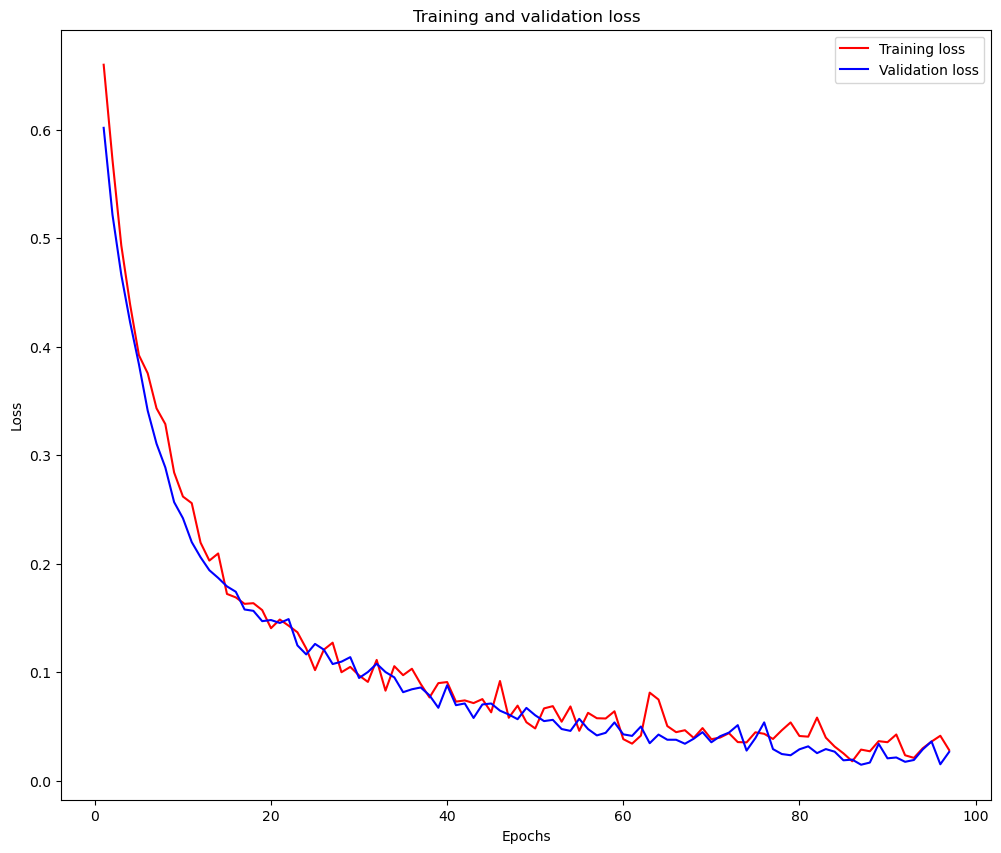

In [127]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

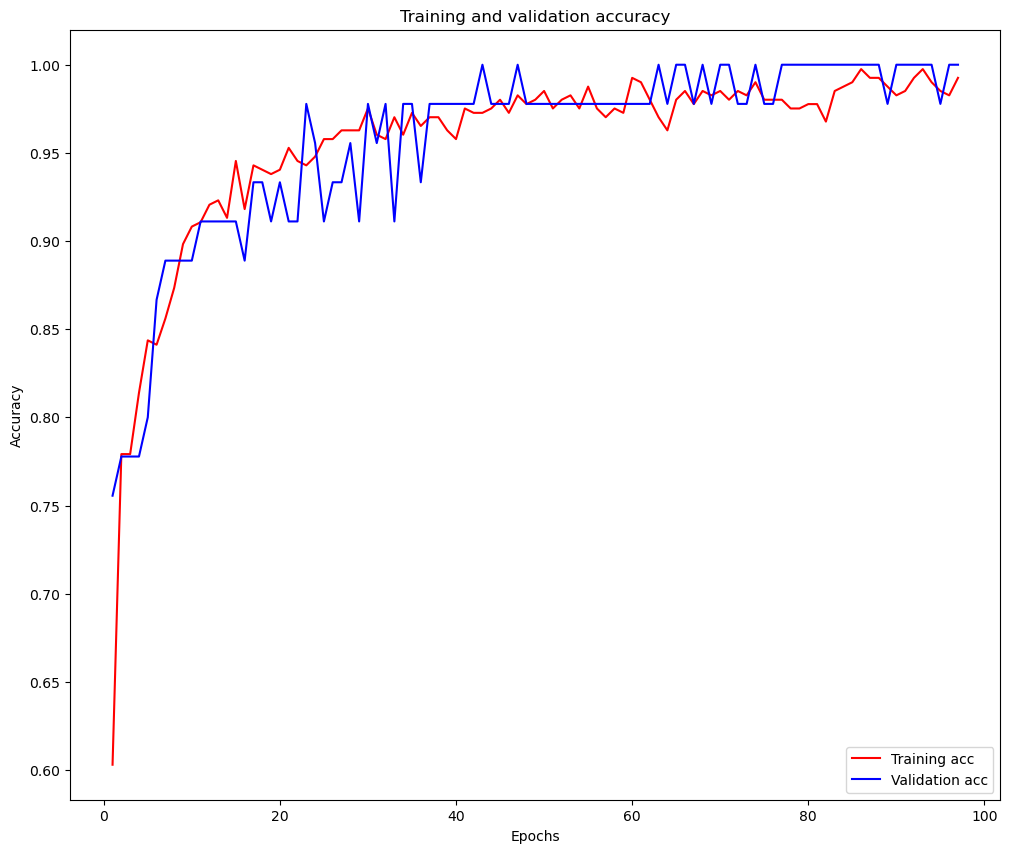

In [128]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [129]:
model.save("push_up_ready_poses_classification_v2.keras")

In [130]:
reconstructed_model = keras.models.load_model("push_up_ready_poses_classification_v2.keras")
test_loss_reconstructed, test_acc_reconstructed = reconstructed_model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy reconstructed:', test_acc_reconstructed)
print("Test loss reconstructed:", test_loss_reconstructed)

4/4 - 0s - loss: 0.1395 - accuracy: 0.9732 - 306ms/epoch - 77ms/step

Test accuracy reconstructed: 0.9732142686843872
Test loss reconstructed: 0.13947682082653046


# Logic of counting the repetition of the push up

In [ ]:
# isReadyPose() returns the boolean value about whether the user is in ready-pose of the push-up
# it needs a trained classifier to determine
while isReadyPose():
    # The user has to hold the ready-pose for 3 seconds, then the counter starts
    # start counting down 3...2...1... then the counting of repetition starts
    
    # predict it is a UP or DOWN
    count_pushup = 0
    current_pushup_state = 1
    if y_pred == 1:  # push-up UP
        if y_pred != current_pushup_state:
            count_pushup += 1
            current_pushup_state = y_pred
    
        
    else:
        if 